# Detection of Drowsiness for Drivers, using CNN.

* In this project we use OpenCV and TensorFlow

We develop a deep learning model to detect and determine whether a driver's eyes are open or closed classiying it into one of the two categories, using the **yawn-eye** dataset which consists of 617 images, split into training and test datasets. The dataset consists of subfolders of labelled data; closed, open, yawn , no_yawn.
We then train and test the developed deep learning model. 
To test the accuracy of predictions for this model in real time, we take images from 
a computer webcam using OpenCV and then fed to a deep learning model which then classifies the person's eyes as either open or closed, displaying a text on the screen and issuing a sound alert.

The steps followed in this project are:
1. Take image inputs from the dataset.
2. Determine a Region of Interest(ROI), for the detected face and eyes.
3. Feed this to a classifier(model), which classifies the eyes as either open or closed.
4. Keep track of how much time has elapsed with the person'e eyes open or closed, thus classifying the person as either drowsy or not.

## 1. Creating a model to identify whether the driver's eyes are open or closed.

### Loading the dataset

* The dataset contains four subfolders inside train and test folders. We will access the data and use it to train the model.    
* We will pre-process the images and then use them for model training.  
* Once the model is trained, we store the weights and model architecture in the file "models/result_model".


**Model architecture**

We use keras to build the model with the use of Convolutional Neural Networks(CNN).   
CNN is a deep neural network which is ideal for image classification.    
It consists of an input layer, output layer and hidden layers. The operation is performed using a filter that performs 2-dimension matrix multiplication on the layers.   

**The architecture we use in this project is:**
    
A CNN model made up of the following layers:

* Convolutional layer; 64 nodes, kernel size 3  
* Convolutional layer; 64 nodes, kernel size 3  
* Convolutional layer; 64 nodes, kernel size 3  
* Fully connected layer; 128 nodes   

The output layer is a fully connected 2-node layer. 
We use relu as the activation function for all layers except the output layer. where we use the Softmax activation function.

In [1]:
#!pip install pygame

In [2]:
#importing libraries
import cv2
import os
import random
from keras.models import load_model
import numpy as np

#CNN model
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense

#Saving the trained model
import pickle  #saving model to a pickle file


In [3]:
#loading the dataset

#path to dataset
path = r'eye_dataset/train'
# categories of interest
GROUPS = ['Closed' , 'Open']

In [4]:
#Specifying image size
image_size = 24
data = []

#iterating through each image and expressing the image as an array
for group in GROUPS:
    folder = os.path.join(path,group)
    label = GROUPS.index(group)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        img_arr = cv2.resize(img_arr,(image_size, image_size),1)
        data.append([img_arr , label])

In [5]:
#checking the length of the data
len(data)

1234

In [6]:
#randomly shuffling the data
random.shuffle(data)

In [7]:
#splitting the data into attributes and labels
X = []
Y = []

for attributes,labels in data:
    X.append(attributes)     #features
    Y.append(labels)     

In [8]:
#coverting X and Y into an array
X = np.array(X)
Y = np.array(Y)

## Saving the trained model in a Pickle file for future use.

* Machine learning models take along time to train on large datasets.   
* Pickle is a Python tool that is useful for saving machine learning models so as to avoid having to retrain your model in order to re-use it.    
* This makes it reusable since the trained model can easily be re-loaded.   
* Pickle save and Pickle load functionality allow for saving and re-run of the saved pre-trained model.    

In [9]:
# save the data
pickle.dump(X , open('X.pkl' , 'wb'))
pickle.dump(Y , open('Y.pkl' , 'wb'))

In [10]:
#Normalizing the input image array - so that values lie between 0 and 1
X = X/255
X

array([[[0.61176471, 0.69803922, 0.70196078, ..., 0.56862745,
         0.55294118, 0.49803922],
        [0.62352941, 0.62745098, 0.59607843, ..., 0.61176471,
         0.57254902, 0.52941176],
        [0.61176471, 0.59215686, 0.62745098, ..., 0.55686275,
         0.59215686, 0.54901961],
        ...,
        [0.62352941, 0.72156863, 0.65882353, ..., 0.62745098,
         0.6       , 0.5372549 ],
        [0.63529412, 0.68627451, 0.72156863, ..., 0.64705882,
         0.60392157, 0.59607843],
        [0.61176471, 0.70196078, 0.76078431, ..., 0.64313725,
         0.61568627, 0.58039216]],

       [[0.0627451 , 0.09019608, 0.10980392, ..., 0.14901961,
         0.15294118, 0.14901961],
        [0.07058824, 0.09411765, 0.10980392, ..., 0.15686275,
         0.15686275, 0.15686275],
        [0.07843137, 0.09803922, 0.10980392, ..., 0.15686275,
         0.15686275, 0.15686275],
        ...,
        [0.12941176, 0.12156863, 0.08627451, ..., 0.16470588,
         0.16470588, 0.16078431],
        [0.1

In [11]:
# reshaping the X array to (24,24,1)
image_rows,image_cols = 24,24
X = X.reshape(X.shape[0],image_rows,image_cols,1)
X.shape

(1234, 24, 24, 1)

## Creating the Model - Using Keras

In [12]:
# creating the model
model = Sequential()

model.add(Conv2D(64 , (3,3) , activation = 'relu' , input_shape= X.shape[1:]))
model.add(MaxPooling2D((1,1)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((1,1)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((1,1)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [13]:
#Training (compiling) the created model
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [14]:
# fitting X , Y to the trained model
model.fit(X, Y, epochs = 5 , validation_split = 0.1 , batch_size = 32)

Epoch 1/5
35/35 [==============================] - 4s 108ms/step - loss: 0.4919 - accuracy: 0.7694 - val_loss: 0.2706 - val_accuracy: 0.9274
Epoch 2/5
35/35 [==============================] - 3s 86ms/step - loss: 0.1814 - accuracy: 0.9279 - val_loss: 0.1800 - val_accuracy: 0.9355
Epoch 3/5
35/35 [==============================] - 3s 80ms/step - loss: 0.1205 - accuracy: 0.9541 - val_loss: 0.1772 - val_accuracy: 0.9113
Epoch 4/5
35/35 [==============================] - 3s 92ms/step - loss: 0.0973 - accuracy: 0.9667 - val_loss: 0.1905 - val_accuracy: 0.9355
Epoch 5/5
35/35 [==============================] - 3s 93ms/step - loss: 0.1019 - accuracy: 0.9649 - val_loss: 0.0925 - val_accuracy: 0.9677


In [15]:
# saving the model to a pickle file
model.save("result_model.h5")

# saving the model to a pickle file
filename = 'result_model.h5'
# save data to a file
with open(filename,'wb') as fout:
    pickle.dump(model,fout)

INFO:tensorflow:Assets written to: ram://e235f65b-47d4-482b-bc94-9d846182625c/assets


INFO:tensorflow:Assets written to: ram://e235f65b-47d4-482b-bc94-9d846182625c/assets


In [16]:
## load the model we created
#model = load_model("result_model.h5")

## Running the Model once again, recording the history, validation loss and accuracy and measuring accuracy of chosen model

In [17]:
from keras.callbacks import ModelCheckpoint

#Training and saving model with the best validation accuracy
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

# fitting X , Y to the trained model
#model.fit(X, Y, epochs = 5 , validation_split = 0.1 , batch_size = 32)
history = model.fit(X, Y,epochs=20, callbacks=[checkpoint], validation_split=0.1, batch_size = 32)

Epoch 1/20
35/35 [==============================] - ETA: 0s - loss: 0.0708 - accuracy: 0.9730

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


35/35 [==============================] - 4s 120ms/step - loss: 0.0708 - accuracy: 0.9730 - val_loss: 0.0820 - val_accuracy: 0.9597
Epoch 2/20
35/35 [==============================] - 4s 111ms/step - loss: 0.0694 - accuracy: 0.9748 - val_loss: 0.0925 - val_accuracy: 0.9516
Epoch 3/20
35/35 [==============================] - ETA: 0s - loss: 0.0658 - accuracy: 0.9766

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


35/35 [==============================] - 4s 122ms/step - loss: 0.0658 - accuracy: 0.9766 - val_loss: 0.0730 - val_accuracy: 0.9677
Epoch 4/20
35/35 [==============================] - ETA: 0s - loss: 0.0557 - accuracy: 0.9793

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


35/35 [==============================] - 9s 268ms/step - loss: 0.0557 - accuracy: 0.9793 - val_loss: 0.0566 - val_accuracy: 0.9758
Epoch 5/20
35/35 [==============================] - 5s 141ms/step - loss: 0.0444 - accuracy: 0.9811 - val_loss: 0.0755 - val_accuracy: 0.9677
Epoch 6/20
35/35 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9955

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


35/35 [==============================] - 5s 154ms/step - loss: 0.0180 - accuracy: 0.9955 - val_loss: 0.0491 - val_accuracy: 0.9677
Epoch 7/20
35/35 [==============================] - 4s 118ms/step - loss: 0.0179 - accuracy: 0.9928 - val_loss: 0.1362 - val_accuracy: 0.9597
Epoch 8/20
35/35 [==============================] - 4s 120ms/step - loss: 0.0309 - accuracy: 0.9874 - val_loss: 0.0517 - val_accuracy: 0.9839
Epoch 9/20
35/35 [==============================] - 5s 134ms/step - loss: 0.0297 - accuracy: 0.9892 - val_loss: 0.0782 - val_accuracy: 0.9758
Epoch 10/20
35/35 [==============================] - 4s 112ms/step - loss: 0.0358 - accuracy: 0.9883 - val_loss: 0.1010 - val_accuracy: 0.9597
Epoch 11/20
35/35 [==============================] - 3s 97ms/step - loss: 0.0138 - accuracy: 0.9946 - val_loss: 0.0648 - val_accuracy: 0.9677
Epoch 12/20
35/35 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9937

INFO:tensorflow:Assets written to: model-012.model\assets


INFO:tensorflow:Assets written to: model-012.model\assets


35/35 [==============================] - 6s 188ms/step - loss: 0.0229 - accuracy: 0.9937 - val_loss: 0.0385 - val_accuracy: 0.9839
Epoch 13/20
35/35 [==============================] - 4s 121ms/step - loss: 0.0222 - accuracy: 0.9937 - val_loss: 0.1106 - val_accuracy: 0.9516
Epoch 14/20
35/35 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9946

INFO:tensorflow:Assets written to: model-014.model\assets


INFO:tensorflow:Assets written to: model-014.model\assets


35/35 [==============================] - 5s 139ms/step - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.0288 - val_accuracy: 0.9919
Epoch 15/20
35/35 [==============================] - 5s 132ms/step - loss: 0.0071 - accuracy: 0.9964 - val_loss: 0.0661 - val_accuracy: 0.9597
Epoch 16/20
35/35 [==============================] - 4s 127ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0292 - val_accuracy: 0.9839
Epoch 17/20
35/35 [==============================] - 5s 129ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0847 - val_accuracy: 0.9758
Epoch 18/20
35/35 [==============================] - 4s 103ms/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 0.0449 - val_accuracy: 0.9839
Epoch 19/20
35/35 [==============================] - 4s 103ms/step - loss: 0.0123 - accuracy: 0.9955 - val_loss: 0.0503 - val_accuracy: 0.9758
Epoch 20/20
35/35 [==============================] - 4s 125ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0429 - val_accuracy: 0.9758


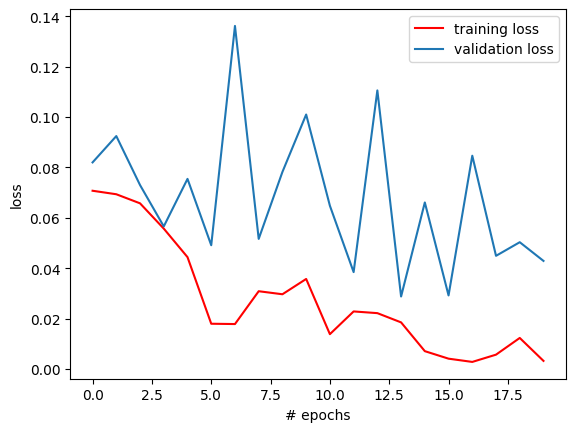

In [18]:
# Plotting train and validation loss per epoch

from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

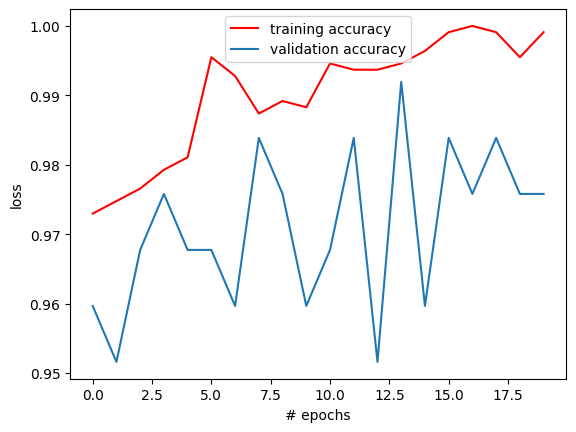

In [19]:
# Plotting train and validation accuracy per epoch

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
#print(model.evaluate(test_data,test_target))
print(model.evaluate(X,Y))
# Model loss and accuracy

39/39 [==============================] - 1s 26ms/step - loss: 0.0050 - accuracy: 0.9976
[0.005045485217124224, 0.9975689053535461]


Links:
https://projectgurukul.org/driver-drowsiness-detection-system-opencv-tensorflow/#:~:text=This%20driver%20drowsiness%20detection%20project%20is%20created%20to,that%20the%20person%E2%80%99s%20eyes%20are%20closed%20or%20open

Dataset: https://www.kaggle.com/datasets/serenaraju/yawn-eye-dataset-new
Pickle: https://practicaldatascience.co.uk/machine-learning/how-to-save-and-load-machine-learning-models-using-pickle

https://www.kaggle.com/code/sayamkumar/driver-drowsiness-detection
